
# Project: Investigating TMDB Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> Welcome to the exploration of Hollywood movies!
this analysis  is meant to dive through over 10,000 movie titles in order to discover valuable relationships between variables such as revenues, budgetm and the profit.
and for better under standing the data set, there are two main questions asked to fullfill the image of this dataset
***
#### The first question is - Have profit increased over time?
####  The second question is - What properties are associated with higher profit ?
***
and this analysis is divied to three steps:- <br>

1. Data Warngling - in this step this code Gathered, loaded, and assessed the data.
2. Data Cleaning  - in this step this analysis ensure our dataset is clean and ready to be used to outcome an accurate analysis
3. Data Analysis  - this is the step where can understand the bigger picture and get to insights of our dataset


In [36]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [37]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [38]:
df.shape

(10866, 21)

In [39]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [40]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [41]:
df.info()
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [42]:
df.isnull().sum()
"""the cloumns homebage, and tagline are full of null cells , and it can be droped"""

'the cloumns homebage, and tagline are full of null cells , and it can be droped'

In [43]:
#view the null values
df[df.isnull().any(axis=1)].sort_values(['runtime'], ascending=True)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
5992,173847,tt2343371,0.096455,0,0,Amiche da morire,Claudia Gerini|Cristiana Capotondi|Sabrina Imp...,NaN,Giorgia Farina,NaN,...,Three very different women who are hiding a se...,0,Romance|Crime|Comedy,NaN,3/7/13,30,5.5,2013,0.000000e+00,0.000000e+00
6934,13713,tt0477988,0.071872,0,0,Jean-Philippe,Fabrice Luchini|Johnny Hallyday|Jackie Berroye...,NaN,Laurent Tuel,NaN,...,No overview found.,0,Comedy,FidÃ©litÃ© Productions|StudioCanal|TF1 Films P...,4/5/06,26,5.6,2006,0.000000e+00,0.000000e+00
2315,48373,tt1274296,0.171615,0,0,Listen to Your Heart,Alexia Rasmussen|Kent Moran|Cybill Shepherd|Sh...,http://www.listentoyourheartfilm.com/,NaN,One song can change your life.,...,Danny Foster doesn't have much: an apartment a...,0,Drama|Music|Romance,NaN,8/14/10,29,7.3,2010,0.000000e+00,0.000000e+00
2370,127717,tt1525359,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,NaN,Michael Scott,NaN,...,NaN,0,NaN,NaN,6/5/10,12,5.8,2010,0.000000e+00,0.000000e+00
1293,286256,tt3134058,0.036904,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,NaN,Mauro Lima,Original language PORTUGUESE,...,"Biopic of Brazilian singer Tim Maia, from his ...",0,Documentary|Drama|Music,Globo Filmes,10/30/14,14,6.0,2014,0.000000e+00,0.000000e+00
445,353345,tt3800796,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,NaN,Steven R. Monroe,NaN,...,Taking place years after The Haunting of Molly...,0,Horror,WT Canada Productions,10/9/15,52,5.0,2015,0.000000e+00,0.000000e+00
3884,105885,tt1754944,0.045198,0,0,eCupid,Houston Rhines|Andy Anderson|John Callahan|Gal...,NaN,J.C. Calciano,NaN,...,From the director of Is It Just Me? comes this...,0,Romance,NaN,6/23/11,12,4.6,2011,0.000000e+00,0.000000e+00
6552,13739,tt0448245,0.006440,0,0,Quatre Ã©toiles,JosÃ© Garcia|Isabelle CarrÃ©|RenÃ©e Le Calm|Fr...,NaN,Christian Vincent,NaN,...,No overview found.,0,Comedy,NaN,1/1/05,15,5.9,2005,0.000000e+00,0.000000e+00
410,339342,tt2948712,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,NaN,Kenny Gage|Devon Downs,NaN,...,Six young college hopefuls vacationing and par...,0,Horror,NaN,1/1/15,15,5.6,2015,0.000000e+00,0.000000e+00
8874,46406,tt0248185,0.069903,0,0,Mission Kashmir,Sanjay Dutt|Hrithik Roshan|Preity Zinta|Jackie...,NaN,Vidhu Vinod Chopra,NaN,...,A police officer adopts the son and sole survi...,0,Action|Drama|Foreign,NaN,10/27/00,10,5.7,2000,0.000000e+00,0.000000e+00


### Data Cleaning (Checking the null values and the duplicate rows)

In [44]:
#copy the Data Frame to make sure the orignal data still the same
new_df = df.copy()

In [45]:
new_df["genres"].value_counts(dropna = False)
"""Checking the Geners and it\'s values, if i can analysis the profit of every genre"""

"Checking the Geners and it's values, if i can analysis the profit of every genre"

In [46]:
new_df.drop(['imdb_id', 'homepage','genres', 'tagline', 'keywords', 'overview', 'production_companies'], axis=1, inplace=True)
new_df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [47]:
new_df['release_date'] = pd.to_datetime(new_df['release_date'])
new_df.dtypes

id                         int64
popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
runtime                    int64
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
budget_adj               float64
revenue_adj              float64
dtype: object

In [48]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# Find out if there are any duplicate rows
sum(new_df.duplicated())

1

In [49]:
#there is only one duplicate row, so it can be removed
new_df.drop_duplicates(inplace=True)

In [50]:
#check the null values again
new_df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [51]:
new_df.dropna(inplace=True)
new_df.isnull().sum().any()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10751 entries, 0 to 10865
Data columns (total 14 columns):
id                10751 non-null int64
popularity        10751 non-null float64
budget            10751 non-null int64
revenue           10751 non-null int64
original_title    10751 non-null object
cast              10751 non-null object
director          10751 non-null object
runtime           10751 non-null int64
release_date      10751 non-null datetime64[ns]
vote_count        10751 non-null int64
vote_average      10751 non-null float64
release_year      10751 non-null int64
budget_adj        10751 non-null float64
revenue_adj       10751 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(6), object(3)
memory usage: 1.2+ MB


In [52]:
new_df["release_year"].value_counts(dropna = False)
#it can be mergeb by decades!

2014    683
2013    652
2015    618
2012    577
2011    532
2009    527
2008    487
2010    476
2007    432
2006    404
2005    362
2004    307
2003    281
2002    264
2001    242
2000    225
1999    224
1998    210
1996    204
1997    191
1994    184
1993    177
1995    175
1988    142
1989    136
1991    133
1992    132
1990    132
1987    124
1986    120
1985    108
1984    104
1981     82
1982     81
1983     80
1980     78
1978     65
1979     57
1977     56
1971     55
1973     55
1974     47
1976     47
1966     46
1975     44
1964     42
1970     41
1972     40
1967     38
1968     38
1965     35
1963     34
1962     32
1960     32
1961     31
1969     30
Name: release_year, dtype: int64

In [53]:
bin_edges = [1959, 1970, 1980, 1990, 2000, 2010, 2015]
bin_names = ['sixties', 'seventies', 'eighties', 'nineties', 'two_thousands', 'two_thousand_tens']
new_df['decades'] = pd.cut(new_df['release_year'], bin_edges, labels = bin_names)
new_df.head(35)

,id,popularity,budget,revenue,original_title,cast,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,decades
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,two_thousand_tens
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,two_thousand_tens
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,two_thousand_tens
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,two_thousand_tens
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,two_thousand_tens
5,281957,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08,two_thousand_tens
6,87101,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,2015-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08,two_thousand_tens
7,286217,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08,two_thousand_tens
8,211672,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09,two_thousand_tens
9,150540,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,2015-06-09,3935,8.0,2015,1.609999e+08,7.854116e+08,two_thousand_tens


In [54]:
#add a column for the profit 
new_df['profit'] = new_df['revenue'] - new_df['budget']
new_df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,decades,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,two_thousand_tens,1363528810


In [55]:
new_df.dtypes

id                         int64
popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
runtime                    int64
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
budget_adj               float64
revenue_adj              float64
decades                 category
profit                     int64
dtype: object

In [56]:
new_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,10751.000000,10751.000000,1.075100e+04,1.075100e+04,10751.000000,10751.000000,10751.000000,10751.000000,1.075100e+04,1.075100e+04,1.075100e+04
mean,65321.865687,0.651726,1.477611e+07,4.024488e+07,102.409636,219.438378,5.965445,2001.263789,1.773226e+07,5.190948e+07,2.546877e+07
std,91517.920739,1.004096,3.104220e+07,1.175558e+08,30.586475,578.341974,0.930961,12.820216,3.444273e+07,1.453071e+08,9.706652e+07
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,10551.500000,0.210596,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,20410.000000,0.386432,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,74468.000000,0.720018,1.600000e+07,2.491248e+07,112.000000,148.000000,6.600000,2011.000000,2.103337e+07,3.451316e+07,9.846142e+06
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09


In [57]:
# make sure no negative numbers for profit
new_df.loc[new_df['profit'] < 0, 'profit'] = 0

In [58]:
#and we can calculate the profit percentage
new_df['gross_profit_percentage'] = (new_df['profit'] / (new_df['revenue'] + .0001)) * 100
new_df['gross_profit_percentage'] = new_df['gross_profit_percentage'].astype(int)
new_df.sort_values(['gross_profit_percentage'], ascending=True).head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,decades,profit,gross_profit_percentage
10865,22293,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,74,2066-11-15,15,1.5,1966,1.276423e+05,0.000000,sixties,0,0
8956,39899,0.096512,32000000,0,Turkey Shoot,Steve Railsback|Olivia Hussey|Michael Craig|Ca...,Brian Trenchard-Smith,93,1982-03-25,11,5.3,1982,7.230856e+07,0.000000,eighties,0,0
8957,20980,0.064322,0,0,Liquid Sky,Anne Carlisle|Paula E. Sheppard|Susan Doukas|O...,Slava Tsukerman,112,1982-08-01,12,5.0,1982,0.000000e+00,0.000000,eighties,0,0
8958,27813,0.078482,35000,0,Basket Case,Kevin Van Hentenryck|Terri Susan Smith|Beverly...,Frank Henenlotter,91,1982-04-14,22,5.8,1982,7.908748e+04,0.000000,eighties,0,0
5067,13537,0.462609,6000000,2,Shattered Glass,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,Billy Ray,94,2003-11-14,46,6.4,2003,7.112116e+06,2.370705,two_thousands,0,0


In [59]:
new_df['gross_profit_percentage'].nunique()

100

In [60]:
new_df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
director                   0
runtime                    0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
decades                    0
profit                     0
gross_profit_percentage    0
dtype: int64

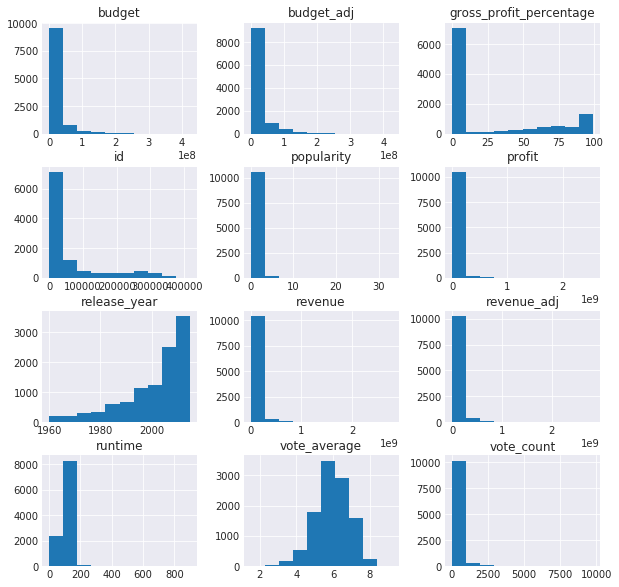

In [61]:
new_df.hist(figsize=(10,10));

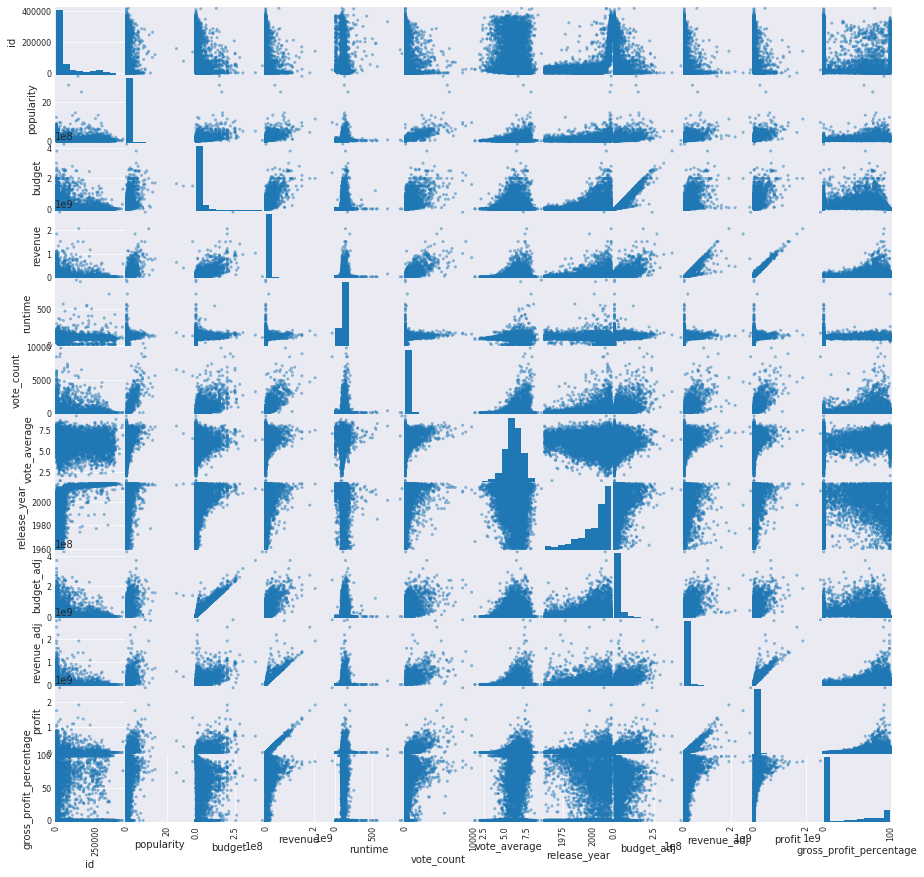

In [62]:
pd.plotting.scatter_matrix(new_df, figsize=(15, 15));

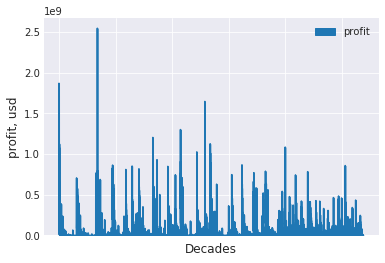

In [63]:
new_df.plot(x='decades', y= 'profit', kind='area');
plt.xlabel('Decades', size=12)
plt.ylabel('profit, usd', size=12);

# <a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 - Have profit increased over time?

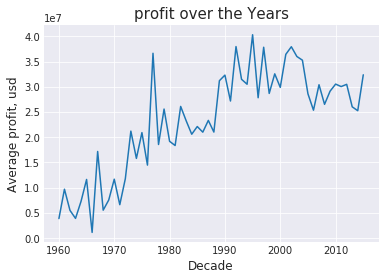

In [64]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
profit_plot = new_df.groupby('release_year')['profit'].mean()
new_df.groupby('decades')['profit'].mean()
plt.plot(profit_plot)
plt.title('profit over the Years', size=15);
plt.xlabel('Decade', size=12)
plt.ylabel('Average profit, usd', size=12);

## Q1 analysis
the profit tends to be increasing over the years 

### Research Question 2  - What properties are associated with higher profit ?

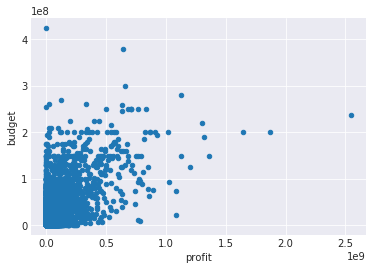

In [65]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
sns.set_style('darkgrid')
new_df.plot(x='profit', y='budget', kind='scatter');

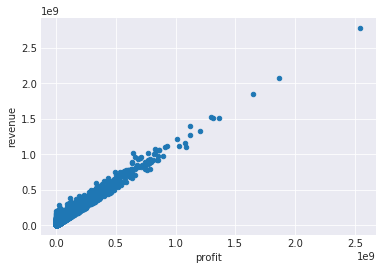

In [66]:
sns.set_style('darkgrid')
new_df.plot(x='profit', y='revenue', kind='scatter');

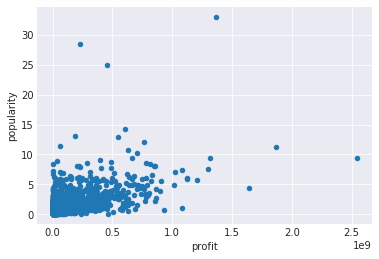

In [67]:
sns.set_style('darkgrid')
new_df.plot(x='profit', y='popularity', kind='scatter');

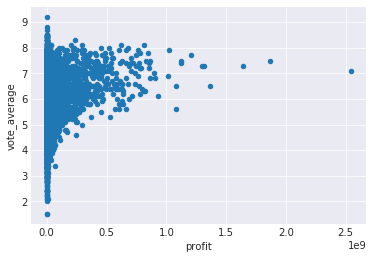

In [68]:
sns.set_style('darkgrid')
new_df.plot(x='profit', y='vote_average', kind='scatter');

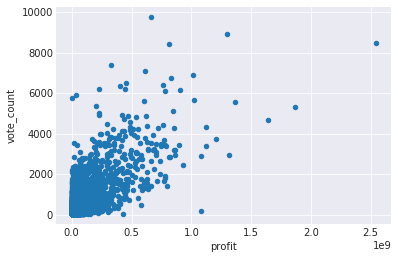

In [69]:
sns.set_style('darkgrid')
new_df.plot(x='profit', y='vote_count', kind='scatter');


# Conclusions

**This report has analyzed the The Movie Database (TMDb) to determine the answers to these two questions**

1. Have profit increased over time?
2. What properties are associated with higher profit ?
***
### The findings
1. the profit have increased over the years

2. profit and budget have a weak positive correlation.

3. profit and Revenue have a strong positive correlation.

4. profit and Vote average have positive correlation, movies with higher voting averages are making more profit
***

### The limitations

1. There are alot of null values that may make the analysis of the report is inaccurate in the colmuns like ( tagline, home page, or keywords)
2. we may have an over view of the most production companies that makes more profit but after removing 1030 of our dataset.


In [70]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0